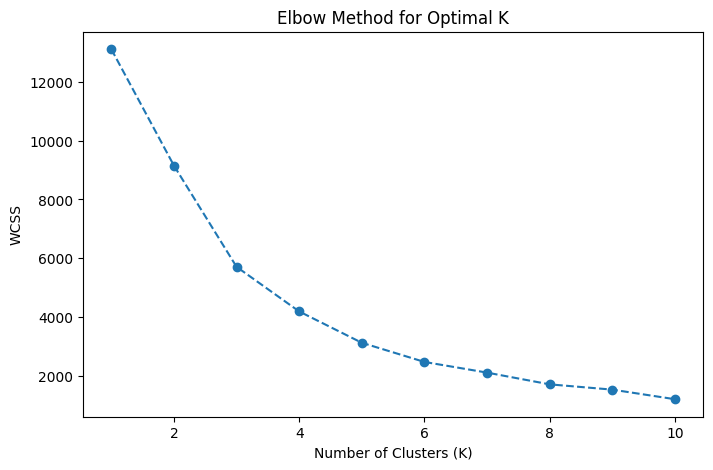

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset (replace 'file_path' with the actual file path)
file_path = "/content/Online Retail clustering lab.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Online Retail")

# Data Preprocessing
df = df.dropna(subset=['CustomerID'])
df['CustomerID'] = df['CustomerID'].astype(int)
df['TotalSpending'] = df['Quantity'] * df['UnitPrice']

# Aggregate data per customer
customer_data = df.groupby('CustomerID').agg(
    TotalSpending=('TotalSpending', 'sum'),
    PurchaseFrequency=('InvoiceNo', 'nunique'),
    AvgBasketSize=('Quantity', 'mean')
).reset_index()

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_data[['TotalSpending', 'PurchaseFrequency', 'AvgBasketSize']])

# Elbow Method to determine optimal K
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()



In [6]:

# Apply K-Means with optimal K (to be chosen based on the elbow method)
k_optimal = 4  # Replace with the actual optimal K found from the elbow method
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Display clustered data
print(customer_data.head())

   CustomerID  TotalSpending  PurchaseFrequency  AvgBasketSize  Cluster
0       12346           0.00                  2       0.000000        0
1       12347        4310.00                  7      13.505495        0
2       12348        1797.24                  4      75.516129        0
3       12349        1757.55                  1       8.643836        0
4       12350         334.40                  1      11.588235        0


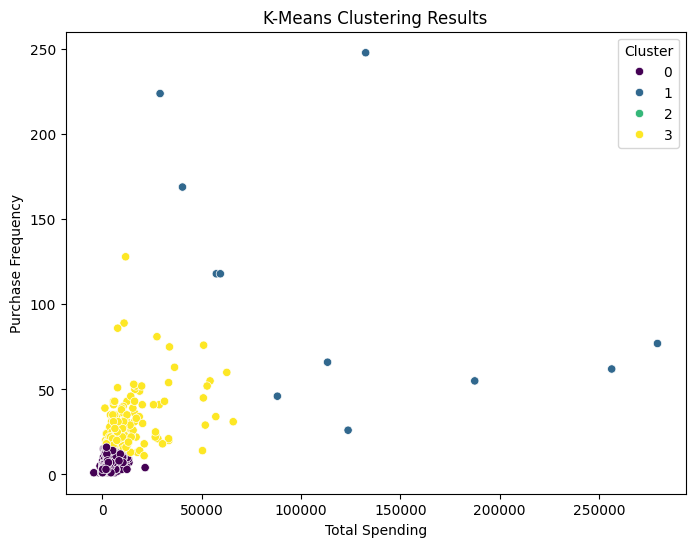

In [8]:
# Visualizing K-Means Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_data['TotalSpending'], y=customer_data['PurchaseFrequency'], hue=customer_data['Cluster'], palette='viridis') # Changed 'KMeans_Cluster' to 'Cluster'
plt.xlabel('Total Spending')
plt.ylabel('Purchase Frequency')
plt.title('K-Means Clustering Results')
plt.legend(title='Cluster')
plt.show()

In [9]:
dbscan = DBSCAN(eps=1.5, min_samples=10, n_jobs=-1)  # Increased eps, min_samples and parallel execution
customer_data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Count noise points (DBSCAN assigns -1 to noise)
num_noise = np.sum(customer_data['DBSCAN_Cluster'] == -1)
print(f"Number of noise points detected by DBSCAN: {num_noise}")

# Display clustered data
print(customer_data.head())

Number of noise points detected by DBSCAN: 35
   CustomerID  TotalSpending  PurchaseFrequency  AvgBasketSize  Cluster  \
0       12346           0.00                  2       0.000000        0   
1       12347        4310.00                  7      13.505495        0   
2       12348        1797.24                  4      75.516129        0   
3       12349        1757.55                  1       8.643836        0   
4       12350         334.40                  1      11.588235        0   

   DBSCAN_Cluster  
0               0  
1               0  
2               0  
3               0  
4               0  


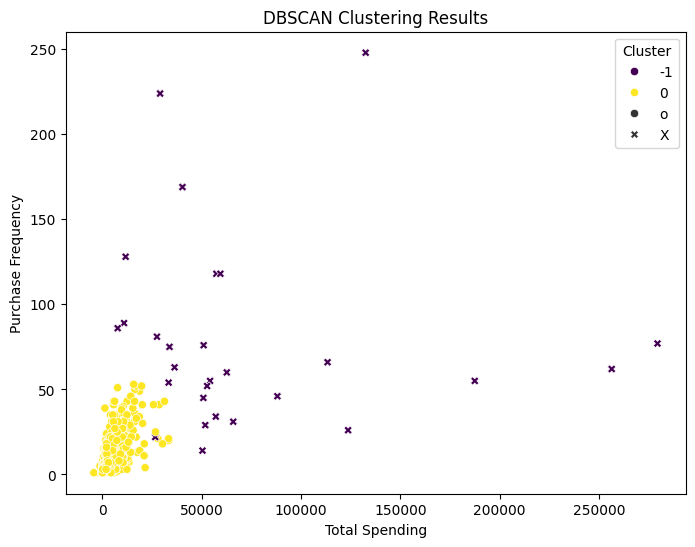

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=customer_data['TotalSpending'],
    y=customer_data['PurchaseFrequency'],
    hue=customer_data['DBSCAN_Cluster'],
    palette='viridis',
    style=customer_data['DBSCAN_Cluster'].apply(lambda x: 'X' if x == -1 else 'o')  # Noise points get a different marker
)
plt.xlabel('Total Spending')
plt.ylabel('Purchase Frequency')
plt.title('DBSCAN Clustering Results')
plt.legend(title='Cluster')
plt.show()


Comparison of K-Means and DBSCAN**  

- **K-Means** creates well-defined clusters but forces all points into groups, even outliers.  
- **DBSCAN** detects arbitrary-shaped clusters and marks noise points (`-1`), making it better for handling outliers.  
- **K-Means** is faster and works well for large datasets but assumes spherical clusters.  
- **DBSCAN** is more flexible but slower, requiring careful tuning of `eps` and `min_samples`.  
- **Result:** K-Means provides structured clusters, while DBSCAN highlights noise and better handles complex data distributions.